**Zadanie 3. (4.5)**

Zaimplementować uproszczony schemat toru transmisji obrazu w systemie telewizji cyfrowej:

1. Przeprowadzić konwersję dowolnego obrazka z RGB do YCbCr i wyświetlić oryginalny obraz i poszczególne składowe w odcieniach szarości (ten punkt jest na ocenę 4.0).
2. Przeprowadzić operację downsamplingu na kanałach CbCr. Ten fragment zadania imituje koder - po tej operacji kanał Y i pomniejszone Cb/Cr są "wysyłane" do dekodera.
3. Przeprowadzić operację upsamplingu na macierzach z pkt. 2 (dekoder)
4. Złożyć obraz z otrzymanych w pkt. 2 wartości i oryginalnego kanału Y.
5. Wyświetlić otrzymany obraz i poszczególne składowe w odzieniach szarości.

Operacja downsamplingu polega na zignorowaniu części wartości w celu zmniejszenia rozmiaru macierzy wyjściowej (w telewizji pozwala to na zaoszczędzenie pasma). Poniższy obrazek przedstawia jej ideę:

<img src="images/downsampling.png" alt="drawing" width="500"/>

Operacja upsamplingu jest przeprowadzana w sposób analogiczny:

<img src="images/upsampling.png" alt="drawing" width="500"/>


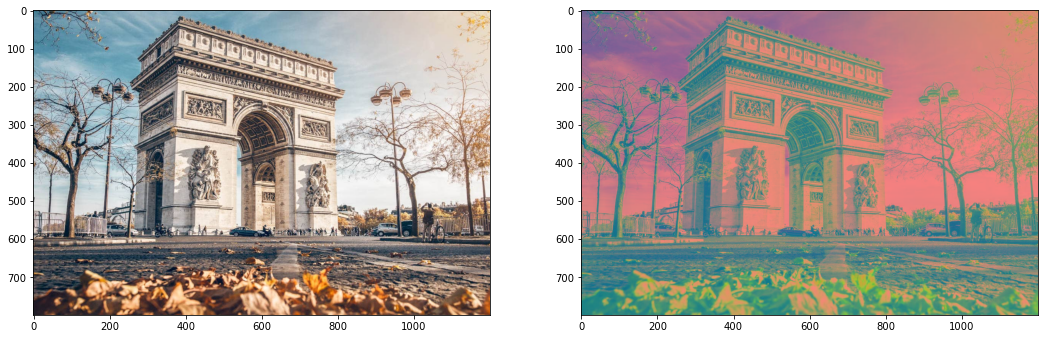

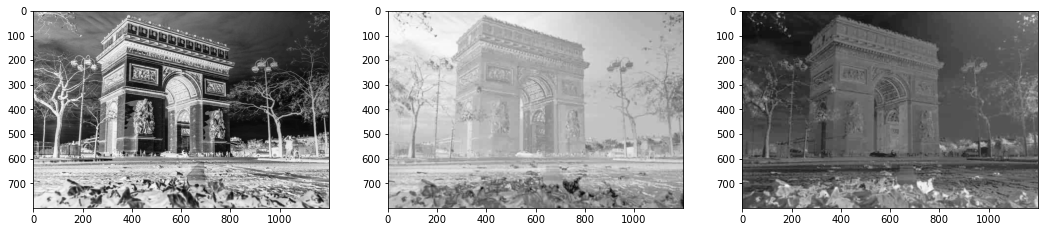

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (18,10)  # Ustawienie rozmarów wyświetlanych obrazów

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_YCRCB = cv.cvtColor(image, cv.COLOR_RGB2YCR_CB)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(image_YCRCB)

fig, ax2 = plt.subplots(1, 3)
ax2[0].imshow(image_YCRCB[:, :, 0], cmap="Greys")
ax2[1].imshow(image_YCRCB[:, :, 1], cmap="Greys")
ax2[2].imshow(image_YCRCB[:, :, 2], cmap="Greys")

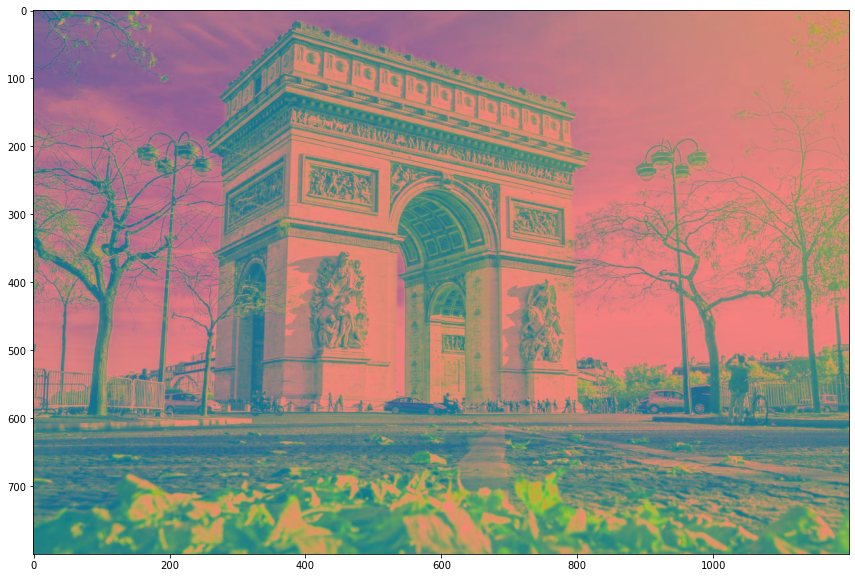

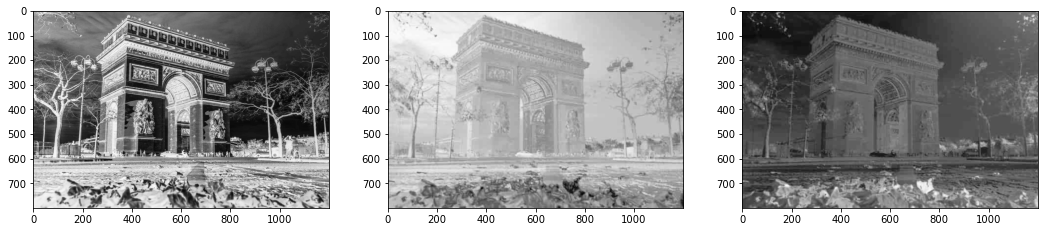

In [5]:
koder = image_YCRCB.copy()
Cb = np.arange((int(image_YCRCB.shape[0]/2))*(int(image_YCRCB.shape[1]/2))).reshape(int(image_YCRCB.shape[0]/2),int(image_YCRCB.shape[1]/2))
Cr = Cb.copy()

for x in range(0, int(koder.shape[0]/2)):
    for y in range(0, int(koder.shape[1]/2)):
        Cb[x,y] = koder[2*x+1, 2*y+1, 1]
        Cr[x,y] = koder[2*x+1, 2*y+1, 2]
        
for x in range(0, int(koder.shape[0]/2)):
    for y in range(0, int(koder.shape[1]/2)):
        koder[2*x, 2*y, 1] = Cb[x,y]
        koder[2*x+1, 2*y+1, 1] = Cb[x,y]
        koder[2*x, 2*y, 2] = Cr[x,y]
        koder[2*x+1, 2*y+1, 2] = Cr[x,y]
               
plt.imshow(koder)         

fig, ax = plt.subplots(1, 3)
ax[0].imshow(koder[:, :, 0], cmap="Greys")
ax[1].imshow(koder[:, :, 1], cmap="Greys")
ax[2].imshow(koder[:, :, 2], cmap="Greys")
               
               

**Zadanie 4. (5.0)**

Policzyć MSE (Mean Squared Error) pomiędzy obrazkiem wejściowym, a wyjściowym z zadania 3.

$$MSE = \frac{1}{m}\frac{1}{n}\sum_{i=1}^{3}\sum_{j=1}^{n}(X_{ij} - \hat{X_{ij}})^2,$$

gdzie: \
$n$ - liczba pikseli obrazu, \
$m$ - liczba kanałów (jest ich trzy - RGB), \
$X_{ij}$ - wartość j-tego koloru i-tego piksela w obrazie wejściowym, \
$\hat{X_{ij}}$ - wartość j-tego koloru i-tego piksela w obrazie wyjściowym.

In [8]:
imgConverted = cv.cvtColor(koder, cv.COLOR_YCR_CB2RGB)
mse = np.sum(np.square(image - imgConverted))
mse /= (float(image.shape[0]*image.shape[1])*3)
print(mse)

1.7402277777777777
